In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = np.loadtxt('CD_player_arm.dat')

In [3]:
data

array([[ 0.0531, -0.0313,  0.0495,  0.0342],
       [ 0.0526, -0.0328,  0.0525,  0.0342],
       [ 0.0504, -0.0482,  0.0485,  0.0567],
       ...,
       [ 0.1732, -0.8419, -0.3305,  0.5317],
       [ 0.1625, -0.6695, -0.2815,  0.1442],
       [ 0.1441, -0.4938, -0.2375,  0.1892]])

In [4]:
u1,u2,y1,y2 = data[:,0],data[:,1],data[:,2],data[:,3]

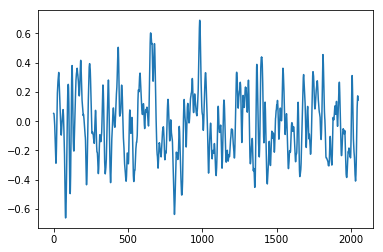

In [5]:
plt.plot(u1)
plt.show()

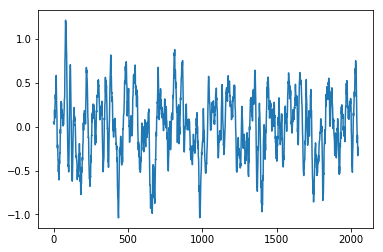

In [6]:
plt.plot(y1)
plt.show()

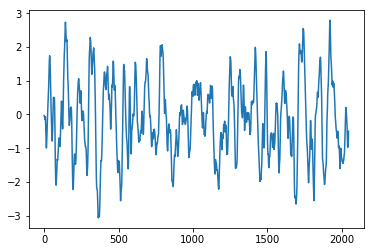

In [7]:
plt.plot(u2)
plt.show()

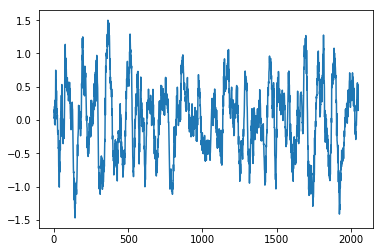

In [8]:
plt.plot(y2)
plt.show()

In [9]:
np.roll([1,2,3],1)

array([3, 1, 2])

In [10]:
from scipy.ndimage.interpolation import shift


In [11]:
shift(np.arange(10),[1])

array([0, 0, 1, 2, 3, 4, 5, 6, 7, 8])

In [58]:
x = np.arange(10)
np.c_[x, np.roll(x,1), np.roll(x,2)]

array([[0, 9, 8],
       [1, 0, 9],
       [2, 1, 0],
       [3, 2, 1],
       [4, 3, 2],
       [5, 4, 3],
       [6, 5, 4],
       [7, 6, 5],
       [8, 7, 6],
       [9, 8, 7]])

In [59]:
def lag_design(x,lags):
    return np.transpose(np.array([np.roll(x,i) for i in range(lags+1)]))[lags:,:]

In [61]:
lag_design(np.arange(10),4)

array([[4, 3, 2, 1, 0],
       [5, 4, 3, 2, 1],
       [6, 5, 4, 3, 2],
       [7, 6, 5, 4, 3],
       [8, 7, 6, 5, 4],
       [9, 8, 7, 6, 5]])

In [62]:
def design(y,u,lag_y,lag_u):
    Y = lag_design(y,lag_y)
    U = lag_design(u,lag_u)
    m = min(Y.shape[0],U.shape[0])
    return Y[:m,0],np.c_[Y[:m,1:],U[:m,:]]

In [63]:
Y,X = design(y1,u1,3,3)

In [64]:
Y.shape,X.shape

((2045,), (2045, 7))

In [65]:
np.linalg.lstsq(X,Y)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([  0.84976721,  -0.1744187 ,   0.2453767 ,   2.88989462,
        -10.73399496,  10.83882156,  -3.13519493]),
 array([4.19733375]),
 7,
 array([33.86831742,  6.77624565,  3.76298452,  1.7385088 ,  1.58558978,
         0.32244115,  0.05266574]))

In [66]:
import statsmodels.api as sm

In [67]:
sm.OLS(Y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.799e+04
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:38:13   Log-Likelihood:                 3426.2
No. Observations:                2045   AIC:                            -6838.
Df Residuals:                    2038   BIC:                            -6799.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8498      0.019     45.225      0.000       0.813       0.887
x2            -0.1744      0.028     -6.135      0.000      -0.230      -0.119
x3             0.2454      0.022     11.130      0.000       0.202       0.289
x4             2.8899      0.200     14.448      0.000       2.498       3.282
x5           -10.7340      0.566    -18.965      0.000     -11.844      -9.624
x6            10.8388      0.591     18.332      0.000       9.679      11.998
x7            -3.1352      0.229    -13.688      0.000      -3.584      -2.686
==============================================================================
Omnibus:                        1.343   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.511   Jarque-Bera (JB):                1.256
Skew:                          -0.051   Prob(JB):                        0.534
Kurtosis:                       3.065   Cond. No.                         643.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
sm.OLS(*design(y1,u1,10,10)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.027e+04
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:38:13   Log-Likelihood:                 5348.8
No. Observations:                2038   AIC:                        -1.066e+04
Df Residuals:                    2017   BIC:                        -1.054e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6412      0.022     75.374      0.000       1.599       1.684
x2            -1.1121      0.043    -25.966      0.000      -1.196      -1.028
x3             0.4869      0.043     11.316      0.000       0.402       0.571
x4             0.2927      0.035      8.328      0.000       0.224       0.362
x5            -0.2964      0.036     -8.132      0.000      -0.368      -0.225
x6            -0.3519      0.045     -7.762      0.000      -0.441      -0.263
x7             0.7360      0.044     16.819      0.000       0.650       0.822
x8            -0.8036      0.039    -20.730      0.000      -0.880      -0.728
x9             0.2384      0.032      7.473      0.000       0.176       0.301
x10            0.1468      0.016      9.093      0.000       0.115       0.178
x11            7.4778      0.134     55.954      0.000       7.216       7.740
x12          -34.3791      0.610    -56.320      0.000     -35.576     -33.182
x13           67.2490      1.580     42.571      0.000      64.151      70.347
x14          -82.0511      2.853    -28.762      0.000     -87.646     -76.456
x15           73.0805      3.881     18.828      0.000      65.469      80.692
x16          -44.6710      4.239    -10.539      0.000     -52.984     -36.358
x17           13.6283      3.792      3.594      0.000       6.192      21.064
x18            4.3758      2.800      1.563      0.118      -1.115       9.867
x19          -10.0350      1.709     -5.871      0.000     -13.387      -6.683
x20            6.9401      0.777      8.936      0.000       5.417       8.463
x21           -1.6478      0.186     -8.845      0.000      -2.013      -1.282
==============================================================================
Omnibus:                        0.868   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.932
Skew:                           0.036   Prob(JB):                        0.628
Kurtosis:                       2.924   Cond. No.                     2.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
sm.OLS(*design(y1,u1,30,30)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.010e+04
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:38:13   Log-Likelihood:                 6106.8
No. Observations:                2018   AIC:                        -1.209e+04
Df Residuals:                    1957   BIC:                        -1.175e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6134      0.026     61.226      0.000       1.562       1.665
x2            -0.6727      0.047    -14.338      0.000      -0.765      -0.581
x3             0.3872      0.051      7.654      0.000       0.288       0.486
x4            -0.6976      0.055    -12.730      0.000      -0.805      -0.590
x5             0.6774      0.059     11.512      0.000       0.562       0.793
x6            -0.8007      0.062    -12.983      0.000      -0.922      -0.680
x7             0.6779      0.064     10.522      0.000       0.552       0.804
x8            -0.4168      0.065     -6.410      0.000      -0.544      -0.289
x9             0.3376      0.066      5.110      0.000       0.208       0.467
x10           -0.1188      0.066     -1.793      0.073      -0.249       0.011
x11            0.1796      0.066      2.711      0.007       0.050       0.310
x12           -0.2477      0.066     -3.738      0.000      -0.378      -0.118
x13           -0.1582      0.067     -2.378      0.018      -0.289      -0.028
x14            0.2608      0.066      3.923      0.000       0.130       0.391
x15           -0.0787      0.067     -1.179      0.239      -0.210       0.052
x16            0.2195      0.066      3.300      0.001       0.089       0.350
x17           -0.1500      0.066     -2.268      0.023      -0.280      -0.020
x18           -0.1193      0.065     -1.838      0.066      -0.247       0.008
x19            0.1689      0.065      2.612      0.009       0.042       0.296
x20           -0.0921      0.064     -1.445      0.149      -0.217       0.033
x21           -0.1688      0.064     -2.658      0.008      -0.293      -0.044
x22            0.2154      0.064      3.388      0.001       0.091       0.340
x23           -0.0731      0.063     -1.168      0.243      -0.196       0.050
x24            0.1390      0.060      2.309      0.021       0.021       0.257
x25           -0.1636      0.056     -2.944      0.003      -0.273      -0.055
x26            0.1698      0.052      3.249      0.001       0.067       0.272
x27           -0.1268      0.048     -2.620      0.009      -0.222      -0.032
x28            0.0708      0.041      1.718      0.086      -0.010       0.152
x29           -0.0673      0.030     -2.257      0.024      -0.126      -0.009
x30            0.0183      0.015      1.211      0.226      -0.011       0.048
x31            6.8446      0.110     62.375      0.000       6.629       7.060
x32          -29.9042      0.560    -53.439      0.000     -31.002     -28.807
x33           51.8046      1.501     34.511      0.000      48.861      54.749
x34          -51.7055      2.561    -20.189      0.000     -56.728     -46.683
x35           41.2034      3.288     12.532      0.000      34.755      47.652
x36          -28.6230      3.715     -7.704      0.000     -35.909     -21.336
x3

In [70]:
sm.OLS(*design(y1,u1,100,100)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.043e+04
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:38:13   Log-Likelihood:                 6170.4
No. Observations:                1948   AIC:                        -1.194e+04
Df Residuals:                    1747   BIC:                        -1.082e+04
Df Model:                         201                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5550      0.029     52.728      0.000       1.497       1.613
x2            -0.5717      0.050    -11.382      0.000      -0.670      -0.473
x3             0.3271      0.055      5.997      0.000       0.220       0.434
x4            -0.7455      0.060    -12.488      0.000      -0.863      -0.628
x5             0.7321      0.063     11.577      0.000       0.608       0.856
x6            -0.6537      0.066     -9.860      0.000      -0.784      -0.524
x7             0.5904      0.069      8.603      0.000       0.456       0.725
x8            -0.4093      0.070     -5.828      0.000      -0.547      -0.272
x9             0.1891      0.071      2.662      0.008       0.050       0.328
x10           -0.0043      0.071     -0.061      0.952      -0.144       0.135
x11            0.1262      0.071      1.773      0.076      -0.013       0.266
x12           -0.1193      0.071     -1.673      0.095      -0.259       0.021
x13           -0.2288      0.071     -3.207      0.001      -0.369      -0.089
x14            0.0522      0.072      0.726      0.468      -0.089       0.193
x15            0.1637      0.072      2.275      0.023       0.023       0.305
x16            0.1502      0.072      2.088      0.037       0.009       0.291
x17           -0.1335      0.072     -1.851      0.064      -0.275       0.008
x18           -0.0686      0.072     -0.949      0.343      -0.210       0.073
x19           -0.0300      0.072     -0.415      0.678      -0.172       0.112
x20            0.0490      0.072      0.678      0.498      -0.093       0.191
x21           -0.0364      0.072     -0.503      0.615      -0.178       0.106
x22            0.2179      0.072      3.015      0.003       0.076       0.360
x23           -0.3051      0.072     -4.233      0.000      -0.446      -0.164
x24            0.1774      0.072      2.451      0.014       0.035       0.319
x25            0.0160      0.072      0.222      0.824      -0.126       0.158
x26            0.0331      0.072      0.457      0.648      -0.109       0.175
x27           -0.0359      0.072     -0.495      0.620      -0.178       0.106
x28           -0.1536      0.072     -2.123      0.034      -0.295      -0.012
x29            0.0995      0.072      1.377      0.169      -0.042       0.241
x30            0.0204      0.072      0.282      0.778      -0.122       0.162
x31            0.0655      0.072      0.905      0.366      -0.077       0.208
x32           -0.1144      0.072     -1.584      0.113      -0.256       0.027
x33           -0.0710      0.072     -0.984      0.325      -0.213       0.071
x34            0.2073      0.072      2.874      0.004       0.066       0.349
x35           -0.1120      0.072     -1.553      0.121      -0.253       0.029
x36            0.0012      0.072      0.016      0.987      -0.140       0.142
x3

In [71]:
res = sm.OLS(*design(y1,u1,100,100)).fit()

In [72]:
test_m,test_n = 20,20
aic_mat = np.zeros([test_m,test_n])
bic_mat = np.zeros([test_m,test_n])


for i in range(1,test_m):
    for j in range(1,test_n):
        res = sm.OLS(*design(y1,u1,i*5,j*5)).fit()
        aic_mat[i,j] = res.aic
        bic_mat[i,j] = res.bic

In [73]:
np.unravel_index(np.argmin(aic_mat.flatten()), aic_mat.shape)

(10, 11)

In [74]:
aic_mat[9,9]

-12114.519720134385

In [75]:
aic_mat[8:11,8:11]

array([[-12116.39397152, -13278.03405492, -13271.1632614 ],
       [ -7244.49485943, -12114.51972013, -13310.89049421],
       [ -7210.7961178 ,  -7233.48108406, -12134.63377057]])

In [76]:
aic_mat[-1,-1]

-11964.370333124893

In [77]:
np.unravel_index(np.argmin(bic_mat.flatten()), bic_mat.shape)

(7, 8)

In [78]:
bic_mat[4,3]

-7066.3348738399145

In [79]:
bic_mat[3:6,2:5]

array([[ -7078.95089082, -11439.00181558, -12284.0752898 ],
       [ -7056.86077553,  -7066.33487384, -11446.21190281],
       [ -7002.58704435,  -6995.87076901,  -7007.25693424]])

In [97]:
test_m,test_n = 50,50
aic_mat = np.zeros([test_m,test_n])
bic_mat = np.zeros([test_m,test_n])


for i in range(30,45):
    for j in range(30,45):
        res = sm.OLS(*design(y1,u1,i,j)).fit()
        aic_mat[i,j] = res.aic
        bic_mat[i,j] = res.bic

In [98]:
np.unravel_index(np.argmin(aic_mat.flatten()), aic_mat.shape)

(38, 44)

In [99]:
np.unravel_index(np.argmin(bic_mat.flatten()), bic_mat.shape)

(33, 38)

In [100]:
res = sm.OLS(*design(y1,u1,33,38)).fit()

In [101]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.692e+04
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:41:14   Log-Likelihood:                 6704.3
No. Observations:                2010   AIC:                        -1.326e+04
Df Residuals:                    1938   BIC:                        -1.286e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6617      0.023     73.589      0.000       1.617       1.706
x2            -0.7040      0.043    -16.194      0.000      -0.789      -0.619
x3             0.2938      0.046      6.376      0.000       0.203       0.384
x4            -0.5063      0.047    -10.872      0.000      -0.598      -0.415
x5             0.4139      0.048      8.637      0.000       0.320       0.508
x6            -0.4801      0.049     -9.804      0.000      -0.576      -0.384
x7             0.3799      0.050      7.591      0.000       0.282       0.478
x8            -0.1638      0.051     -3.221      0.001      -0.263      -0.064
x9             0.1144      0.051      2.254      0.024       0.015       0.214
x10            0.0473      0.051      0.935      0.350      -0.052       0.146
x11            0.0916      0.049      1.856      0.064      -0.005       0.188
x12           -0.2613      0.049     -5.299      0.000      -0.358      -0.165
x13           -0.0574      0.050     -1.158      0.247      -0.154       0.040
x14            0.1484      0.050      2.996      0.003       0.051       0.245
x15            0.0184      0.050      0.371      0.711      -0.079       0.116
x16            0.1533      0.050      3.085      0.002       0.056       0.251
x17           -0.1364      0.050     -2.746      0.006      -0.234      -0.039
x18           -0.0647      0.050     -1.306      0.192      -0.162       0.032
x19           -0.0109      0.049     -0.220      0.826      -0.108       0.086
x20            0.0802      0.049      1.632      0.103      -0.016       0.177
x21           -0.1825      0.048     -3.782      0.000      -0.277      -0.088
x22            0.2150      0.048      4.454      0.000       0.120       0.310
x23           -0.0968      0.048     -2.018      0.044      -0.191      -0.003
x24            0.0991      0.048      2.075      0.038       0.005       0.193
x25           -0.0650      0.048     -1.360      0.174      -0.159       0.029
x26           -0.0039      0.047     -0.083      0.933      -0.096       0.088
x27            0.0595      0.045      1.316      0.188      -0.029       0.148
x28           -0.0498      0.042     -1.193      0.233      -0.132       0.032
x29           -0.0127      0.039     -0.324      0.746      -0.089       0.064
x30            0.0136      0.036      0.375      0.707      -0.057       0.085
x31            0.1033      0.031      3.345      0.001       0.043       0.164
x32           -0.1741      0.022     -7.805      0.000      -0.218      -0.130
x33            0.0648      0.011      5.704      0.000       0.043       0.087
x34            0.5045      0.062      8.179      0.000       0.384       0.625
x35           -2.5908      0.249    -10.386      0.000      -3.080      -2.102
x36            7.3340      0.545     13.451      0.000       6.265       8.403
x3

In [102]:
py,pu = res.params[:33],res.params[33:]
py.shape,pu.shape

((33,), (39,))

In [86]:
py

array([ 1.0413921 , -0.30700092,  1.23134947, -1.76301235,  1.80253027,
       -1.98967043,  1.42507344, -1.17080487,  0.93450843, -0.55980234,
        0.55790229,  0.17927344, -0.56925385,  0.14183435, -0.17714177,
        0.37769244, -0.30349288,  0.13147085])

In [87]:
import control as cnt

In [123]:
sys = cnt.tf(pu, np.r_[1.,-py,np.zeros(5)],0.1)

In [129]:
t,Y = cnt.step_response(sys,np.arange(10))

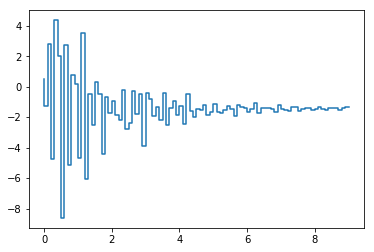

In [130]:
plt.step(np.linspace(t[0],t[-1],Y.shape[1]),Y[0])

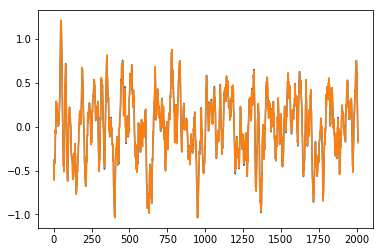

In [110]:
dy,dx = design(y1,u1,33,38)
plt.plot(res.predict(dx))
plt.plot(dy)
plt.show()

In [111]:
dx.shape

(2010, 72)

In [112]:
dx_step = dx.copy()
dx_step[:,33:] = 1.

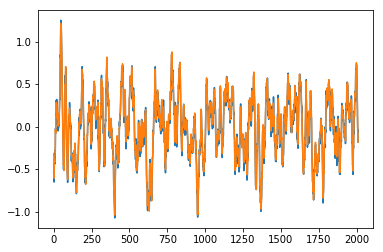

In [114]:
dy,dx = design(y1,u1,33,38)
plt.plot(res.predict(dx_step))
plt.plot(dy)
plt.show()

In [116]:
y = np.zeros(2010)

for t in range(33,2010):
    y[t] = np.r_[y[t-33:t],np.ones(39)] @ res.params

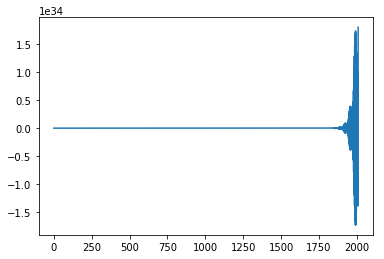

In [117]:
plt.plot(y)

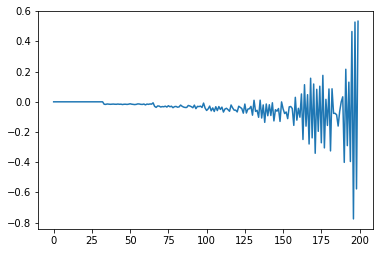

In [122]:
plt.plot(y[:200])

(array([[-0.89679359-0.0731056j , -0.89679359+0.0731056j ,
         -0.89113749-0.31216502j, ...,  0.94506412+0.20934041j,
          0.96281745-0.0194071j ,  0.96281745+0.0194071j ],
        [-0.89679359-0.0731056j , -0.89679359+0.0731056j ,
         -0.89113749-0.31216502j, ...,  0.94506412+0.20934041j,
          0.96281745-0.0194071j ,  0.96281745+0.0194071j ],
        [-0.89679359-0.0731056j , -0.89679359+0.0731056j ,
         -0.89113749-0.31216502j, ...,  0.94506412+0.20934041j,
          0.96281745-0.0194071j ,  0.96281745+0.0194071j ],
        ...,
        [-0.96170774+0.j        , -1.01892703-0.20018948j,
         -0.85422404-0.35511813j, ...,  0.94535836+0.21822356j,
          0.96231953+0.j        ,  1.58082624+0.j        ],
        [-0.96174078+0.j        , -1.01902842-0.20017676j,
         -0.85423343-0.3551267j , ...,  0.94542826+0.21819472j,
          0.96179532+0.j        ,  1.61309873+0.j        ],
        [-0.96174409+0.j        , -1.01903857-0.20017549j,
         -0.8

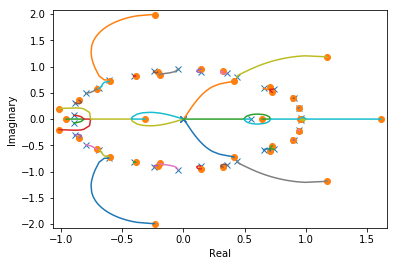

In [131]:
cnt.rlocus(sys)

sanity check

In [89]:
u = np.random.randn(1000)
y = np.zeros(1000)
noise = np.random.randn(1000) * 0.1
param = np.array([0.1,0.2,0.3,0.4,0.5,0.6])

for i in range(3,1000):
    y[i] = param @ np.array([y[i-1],y[i-2],y[i-3],u[i],u[i-1],u[i-2]]) + noise[i]

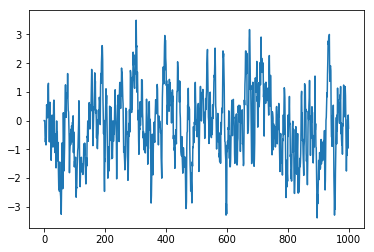

In [90]:
plt.plot(y)

In [91]:
res = sm.OLS(*design(y,u,10,10)).fit()

In [92]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     6897.
Date:                Sat, 29 Sep 2018   Prob (F-statistic):               0.00
Time:                        16:38:23   Log-Likelihood:                 874.27
No. Observations:                 990   AIC:                            -1707.
Df Residuals:                     969   BIC:                            -1604.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0825      0.032      2.569      0.010       0.019       0.146
x2             0.2004      0.032      6.216      0.000       0.137       0.264
x3             0.2819      0.033      8.608      0.000       0.218       0.346
x4             0.0382      0.034      1.126      0.261      -0.028       0.105
x5             0.0257      0.034      0.758      0.449      -0.041       0.092
x6             0.0512      0.034      1.512      0.131      -0.015       0.118
x7            -0.0168      0.034     -0.495      0.620      -0.083       0.050
x8            -0.0387      0.021     -1.880      0.060      -0.079       0.002
x9            -0.0014      0.014     -0.101      0.920      -0.029       0.026
x10           -0.0005      0.013     -0.037      0.970      -0.027       0.026
x11            0.4004      0.003    125.893      0.000       0.394       0.407
x12            0.5074      0.013     38.297      0.000       0.481       0.533
x13            0.6118      0.021     29.138      0.000       0.571       0.653
x14            0.0157      0.029      0.547      0.584      -0.041       0.072
x15           -0.0031      0.029     -0.109      0.914      -0.059       0.053
x16           -0.0109      0.029     -0.381      0.703      -0.067       0.045
x17           -0.0526      0.029     -1.841      0.066      -0.109       0.003
x18           -0.0413      0.029     -1.441      0.150      -0.098       0.015
x19           -0.0334      0.026     -1.264      0.206      -0.085       0.018
x20            0.0024      0.021      0.111      0.912      -0.040       0.044
x21            0.0076      0.009      0.847      0.397      -0.010       0.025
==============================================================================
Omnibus:                        3.019   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.872
Skew:                          -0.120   Prob(JB):                        0.238
Kurtosis:                       3.109   Cond. No.                         54.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
test_m,test_n = 20,20
aic_mat = np.zeros([test_m,test_n])
bic_mat = np.zeros([test_m,test_n])


for i in range(1,test_m):
    for j in range(1,test_n):
        res = sm.OLS(*design(y,u,i,j)).fit()
        aic_mat[i,j] = res.aic
        bic_mat[i,j] = res.bic

In [94]:
np.unravel_index(np.argmin(aic_mat.flatten()), aic_mat.shape)

(3, 3)

In [95]:
np.unravel_index(np.argmin(bic_mat.flatten()), bic_mat.shape)

(3, 3)